In [14]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [15]:
from key import api_key

In [16]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [17]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [18]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [19]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [20]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [21]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [22]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [23]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [24]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [25]:
smiley_pattern = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.85441893 0.1072066  0.16538114]
  [0.56079165 0.71216996 0.24512923]
  [0.34992199 0.17487172 0.42127112]
  [0.18359019 0.41886521 0.51681245]
  [0.11760547 0.33023266 0.86780226]
  [0.8300961  0.34872405 0.08447055]
  [0.25778751 0.04222763 0.81545154]
  [0.25313377 0.47379604 0.07428941]]

 [[0.60499797 0.57114935 0.2165062 ]
  [0.34735179 0.34096145 0.37999755]
  [0.47394124 0.84658733 0.41659659]
  [0.77573991 0.90745523 0.79004349]
  [0.11736522 0.11354079 0.32569584]
  [0.18144393 0.39898487 0.45241614]
  [0.3161777  0.62821861 0.70019318]
  [0.45766914 0.26754233 0.67951812]]]


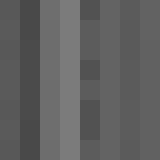

Current loss: 0.6384573006978558


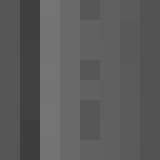

Current loss: 0.6283357352240129


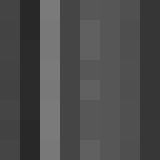

Current loss: 0.6116929202286494


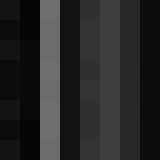

Current loss: 0.6006692849871453


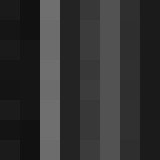

Current loss: 0.5868427522419426


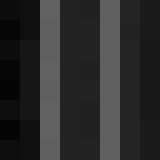

Current loss: 0.5813689521170009


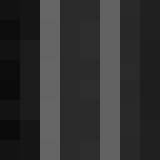

Current loss: 0.580178376316444


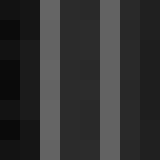

Current loss: 0.5799188958947706


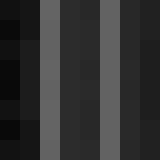

Current loss: 0.5794241346168287


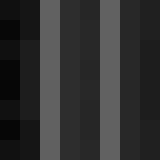

Current loss: 0.5784767146522667


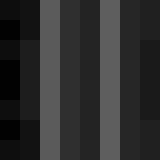

Current loss: 0.5767027078525903


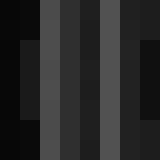

Current loss: 0.5743286820441791


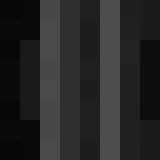

Current loss: 0.5733950820849756


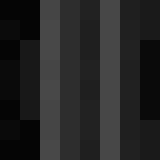

Current loss: 0.5717547853609928


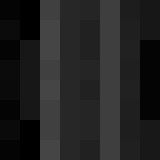

Current loss: 0.5691945141081852


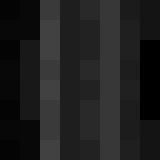

Current loss: 0.5662605602751949


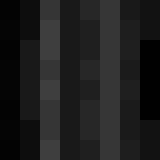

Current loss: 0.563593116841046


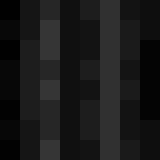

Current loss: 0.5617546743593069


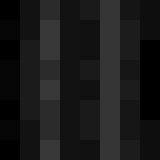

Current loss: 0.5603508366757985


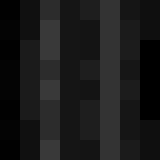

Current loss: 0.5583336765790048


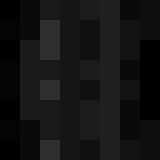

Current loss: 0.5498071826610309


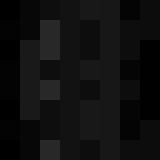

Current loss: 0.5457592937425282


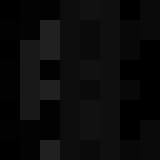

Current loss: 0.5402394833481722


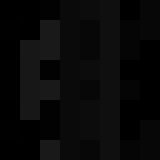

Current loss: 0.5319580154930696


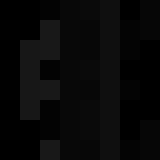

Current loss: 0.5301513989238222


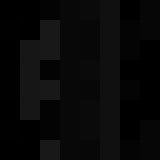

Current loss: 0.5269740564576743


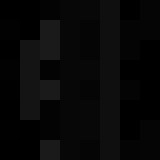

Current loss: 0.5219265267543973


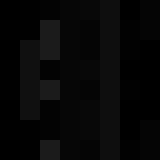

Current loss: 0.5144290138448939


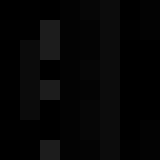

Current loss: 0.5126941067583537


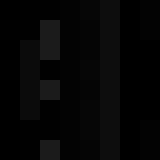

Current loss: 0.5101467310680098


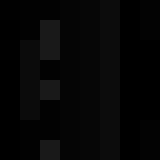

Current loss: 0.5073688879826658


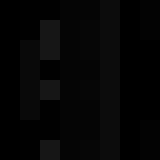

Current loss: 0.5043019110068404


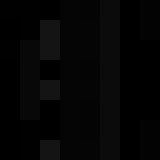

Current loss: 0.502756054291466


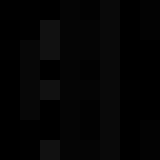

Current loss: 0.5004858890807565


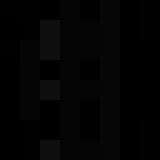

Current loss: 0.4968385377878509


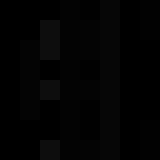

Current loss: 0.4946818383054077


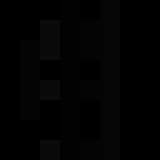

Current loss: 0.4919196247761528


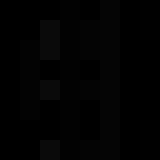

Current loss: 0.4912656767511673


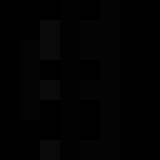

Current loss: 0.49080011444071014


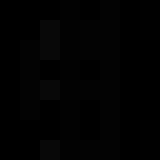

Current loss: 0.49047131361051954


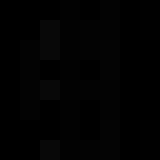

Current loss: 0.489889848253077


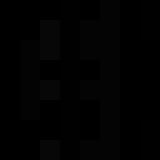

Current loss: 0.48916488914983114


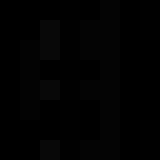

Current loss: 0.48849718976726153


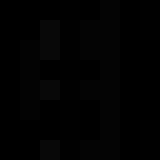

Current loss: 0.48821940036459943


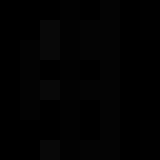

Current loss: 0.48789022879928623


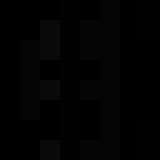

Current loss: 0.48733364875506935


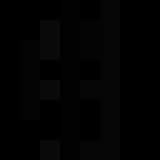

Current loss: 0.4864107903587874


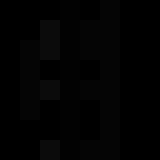

Current loss: 0.485736294028848


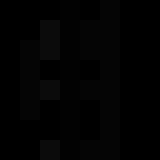

Current loss: 0.4856212080250438


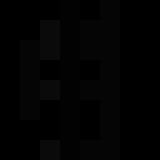

Current loss: 0.48556047944995917


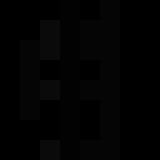

Current loss: 0.48551457591937586


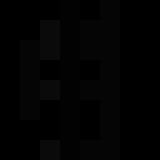

Current loss: 0.4854542598348053


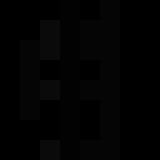

Current loss: 0.4853505459471098


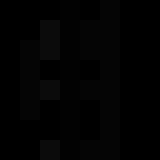

Current loss: 0.4851621101944048


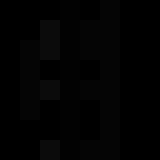

Current loss: 0.48488489731667705


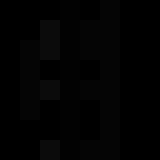

Current loss: 0.4846145063520031


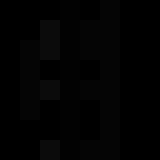

Current loss: 0.4841223185282232


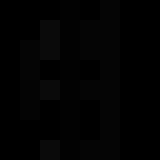

Current loss: 0.48319075123616906


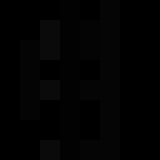

Current loss: 0.4815022172372935


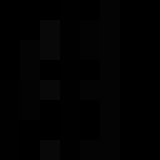

Current loss: 0.47928775711448335


KeyboardInterrupt: 

In [26]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [ ]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [0.67928865 0.71778426 0.93824806 0.92611934 0.64509002 0.8818195
 0.47311776 0.95152441 0.31606993 0.95628614 0.35904326 0.13370218
 0.09666096 0.0576838  0.8641203  0.69311919 0.25810804 0.26512244
 0.89593646 0.26003285 0.68852578 0.75157052 0.06639398 0.26691902
 0.63536109 0.34863287 0.55994927 0.12641069 0.54205656 0.18717891
 0.56273618 0.36080707 0.27434625 0.55958624 0.32189184 0.70232989
 0.39718655 0.2636087  0.75472866 0.28751395 0.86462174 0.71309505
 0.59932485 0.92124819 0.78455229 0.02322634 0.84560523 0.43955606]
Optimized Expectation Value: 0


In [ ]:
res = circuit(weights_p1,0)
# print(res)

In [ ]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index